In [1]:
# Install catalax
# !pip install catalax

In [2]:
import json

import catalax as ctx
import catalax.neural as ctn
import catalax.mcmc as cmc
import jax.numpy as jnp

# Set the number of workers used for parallelizations
ctx.set_host_count(10)

In [3]:
# Load model
model = ctx.Model.load("./models/menten_model_w_priors.json")

# Load data
data = jnp.load("./data/data.npy")
time = jnp.load("./data/time.npy")
initial_conditions = json.load(open("./data/initial_conditions.json", "r"))

# Load neural ODE
neuralode = ctn.NeuralODE.from_eqx("./trained/menten_trained.eqx")


In [4]:
# First, lets repeat the analysis of MCMC.ipynb
mcmc, bayes_model = cmc.run_mcmc(
    model=model,
    data=data,
    initial_conditions=initial_conditions,
    times=time,
    yerrs=2.0,
    num_warmup=1000,
    num_samples=1000,
    dt0=0.1,
    max_steps=64**4
)

🔸 Priors
├── v_max: U(low=1e-06, high=200.0)
├── K_m: U(low=1e-06, high=1000.0)

🚀 Running MCMC



sample: 100%|██████████| 2000/2000 [02:20<00:00, 14.28it/s, 11 steps of size 1.85e-01. acc. prob=0.93]



🎉 Finished

                mean       std    median      5.0%     95.0%     n_eff     r_hat
       K_m     99.86      0.62     99.88     98.85    100.89    460.06      1.00
     sigma      0.95      0.02      0.95      0.90      0.98    440.44      1.00
     v_max      7.00      0.02      7.00      6.97      7.03    471.50      1.00

Number of divergences: 0


/Users/janrange/GitHub/Catalax/catalax/mcmc/plotting.py:99: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


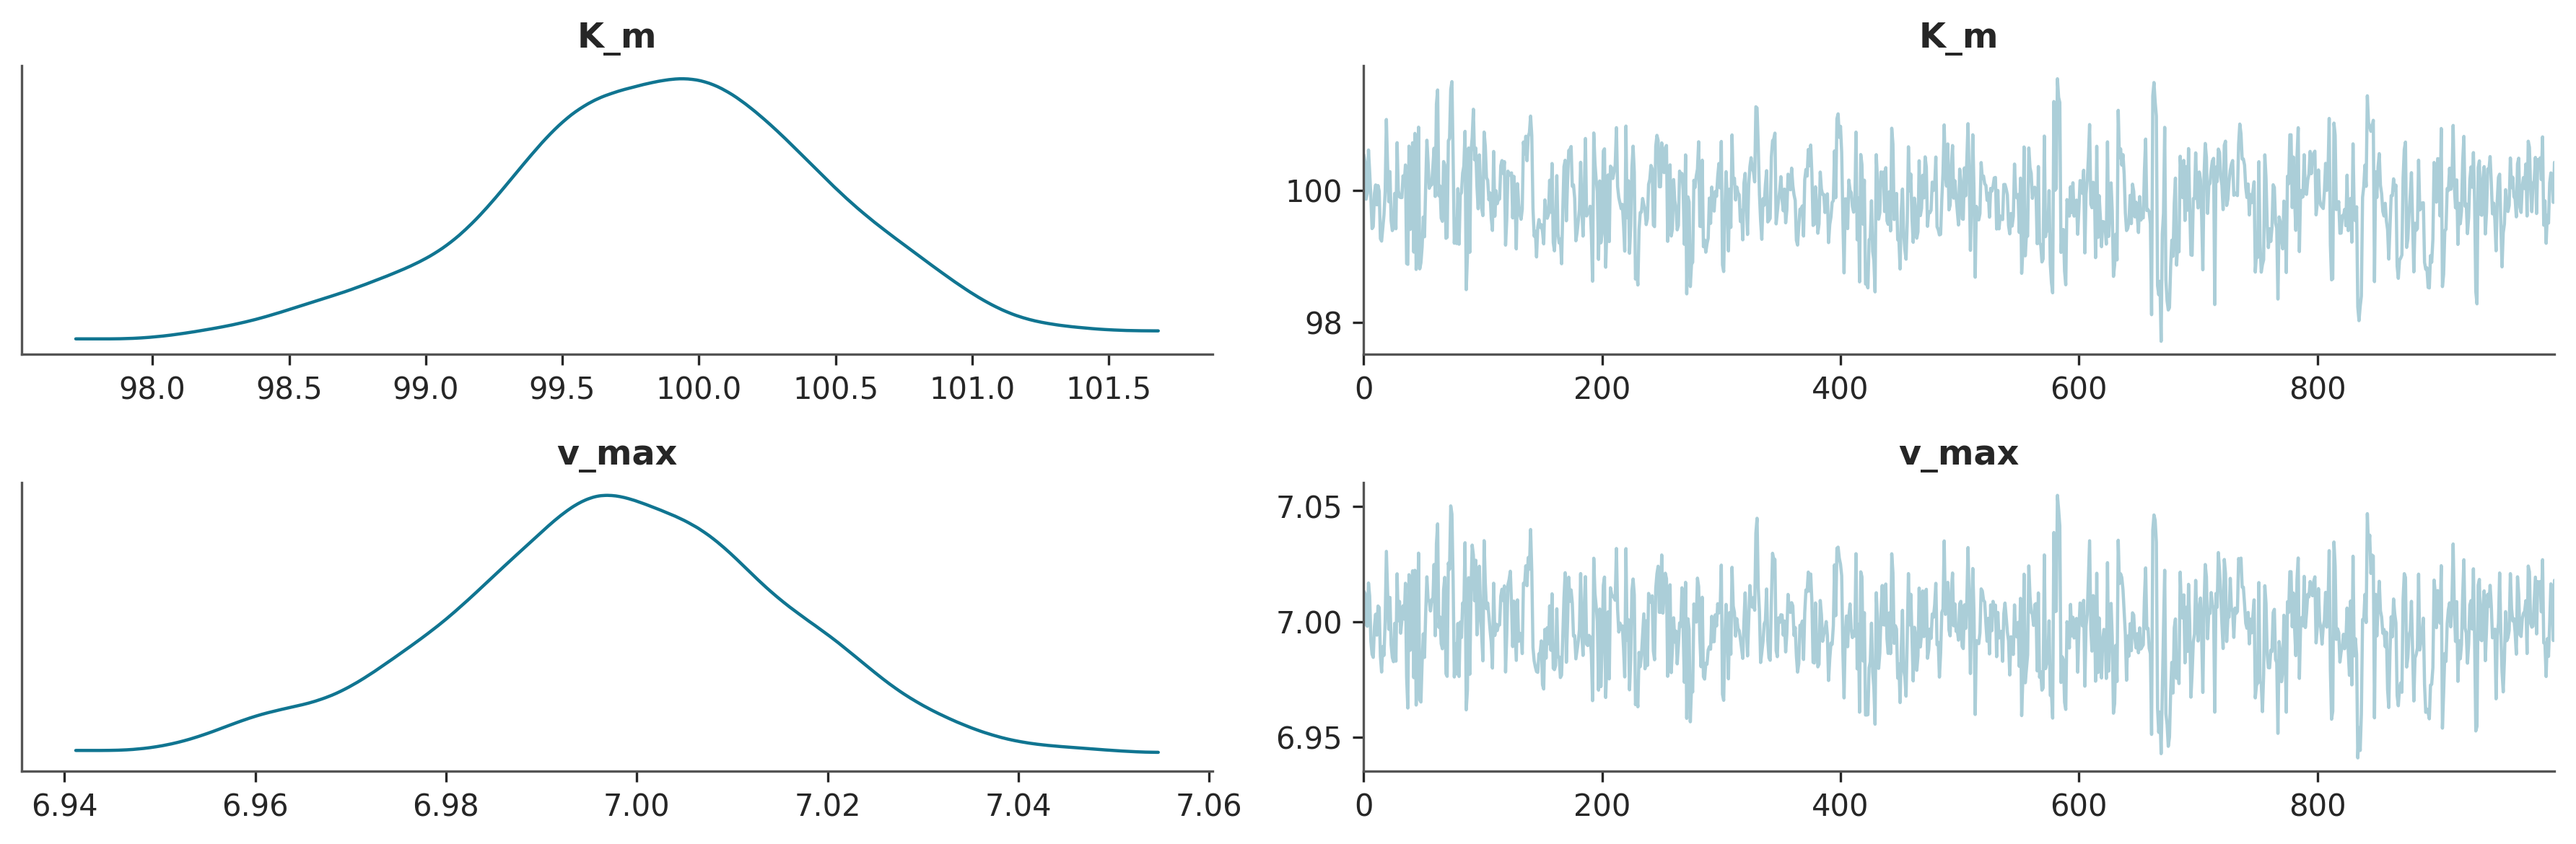

In [5]:
# Plot the posterior distributions
f = cmc.plot_trace(mcmc, model)

In [6]:
# Next, simply pass the neural ODE and the surrogate HMC will be used
mcmc, bayes_model = cmc.run_mcmc(
    model=model,
    neuralode=neuralode,
    data=data,
    initial_conditions=initial_conditions,
    times=time,
    yerrs=2.0,
    num_warmup=1000,
    num_samples=1000,
    dt0=0.1,
    max_steps=64**4
)

🔸 Priors
├── v_max: U(low=1e-06, high=200.0)
├── K_m: U(low=1e-06, high=1000.0)

🚀 Running MCMC



sample: 100%|██████████| 2000/2000 [00:00<00:00, 2087.20it/s, 15 steps of size 3.08e-01. acc. prob=0.94]



🎉 Finished

                mean       std    median      5.0%     95.0%     n_eff     r_hat
       K_m    102.09      0.91    102.08    100.65    103.55    279.56      1.00
     sigma      0.07      0.00      0.07      0.07      0.07    842.71      1.00
     v_max      7.10      0.03      7.10      7.05      7.15    298.01      1.00

Number of divergences: 0


/Users/janrange/GitHub/Catalax/catalax/mcmc/plotting.py:99: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


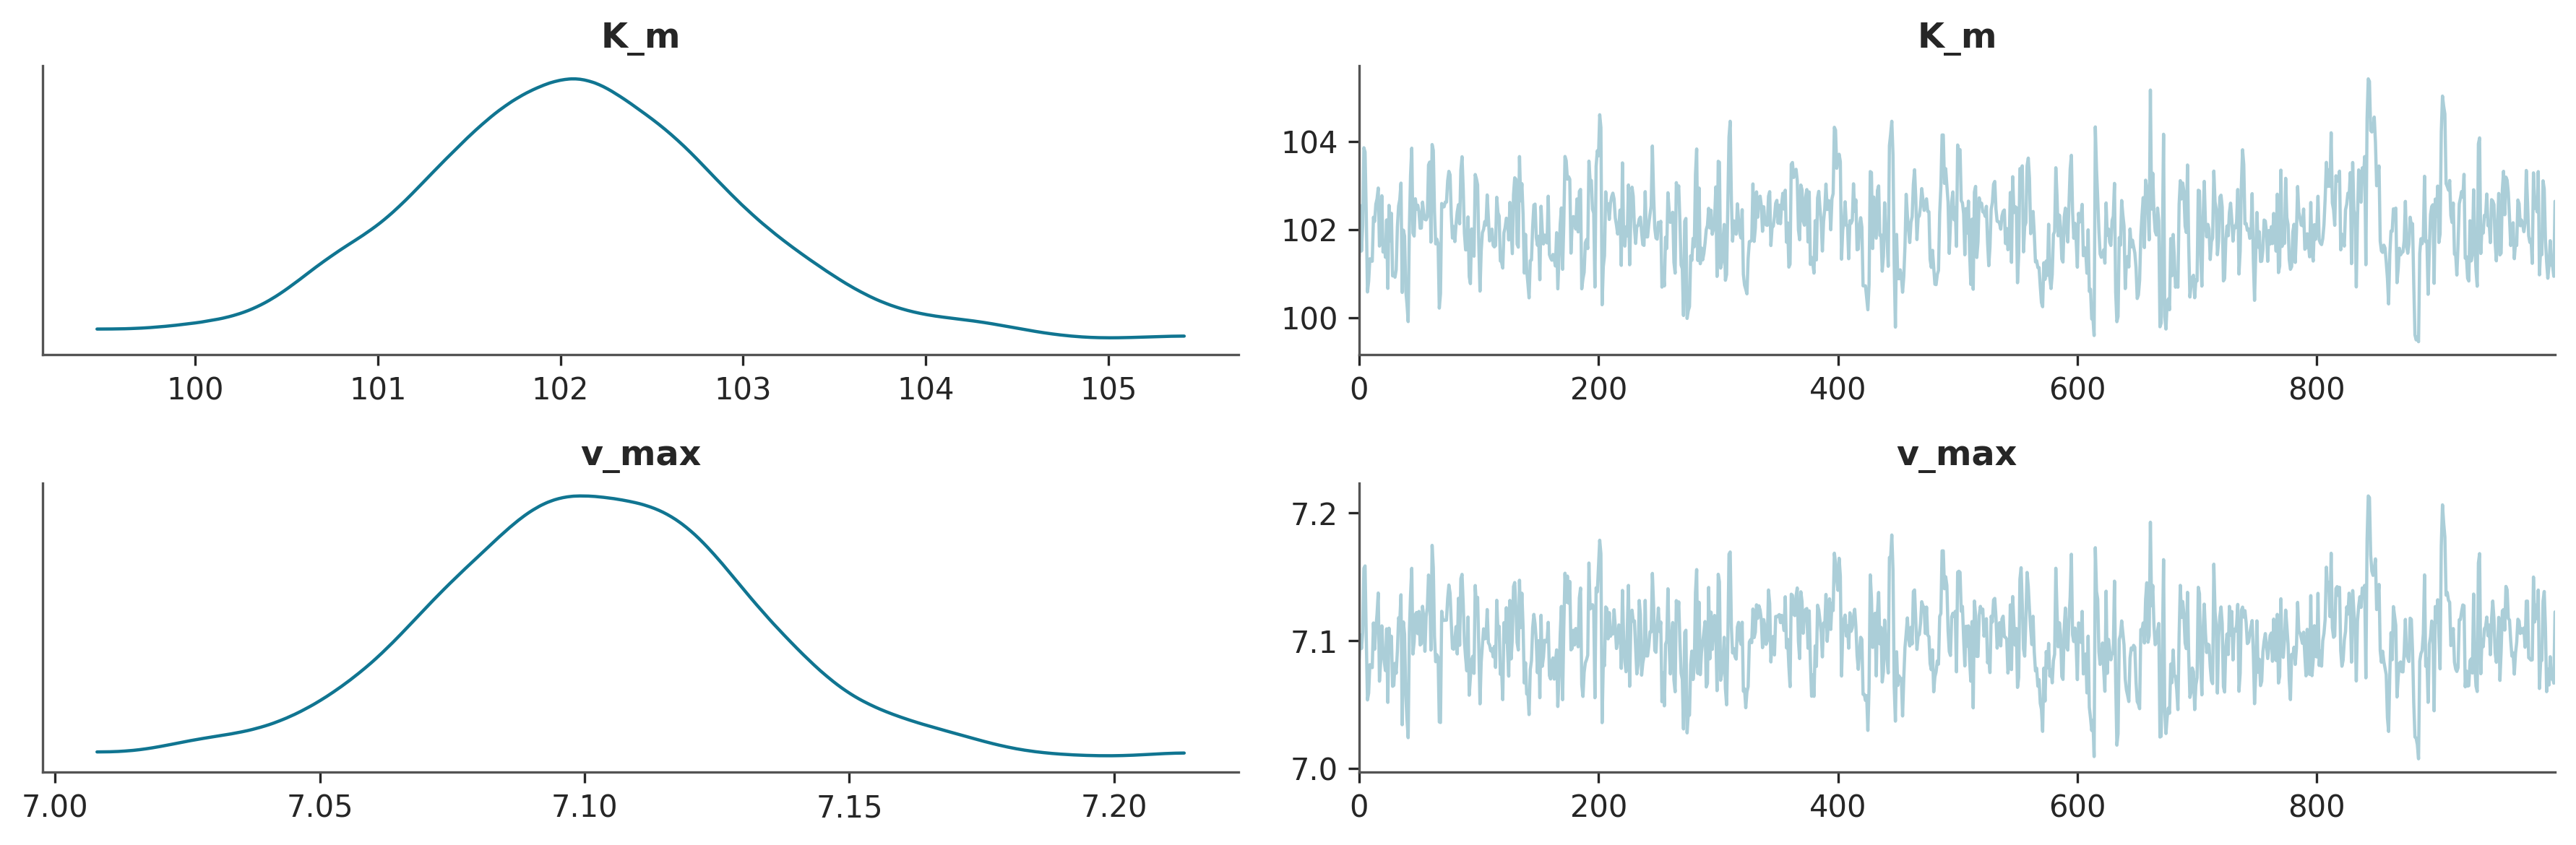

In [7]:
# Plot the posterior distributions
f = cmc.plot_trace(mcmc, model)

In [8]:
# Lets scale this up to a bigger amount of samples
# and add more chains on top of that
#
# If you are previewing from GitHub, the progress bars appear
# to be stuck at 0% but the code has been run and oin total
# took ~17s on my machine (Try it yourself, to verify!)

mcmc, bayes_model = cmc.run_mcmc(
    model=model,
    neuralode=neuralode,
    data=data,
    initial_conditions=initial_conditions,
    times=time,
    yerrs=2.0,
    num_warmup=10_000,
    num_samples=1_000_000,
    chain_method="parallel",
    num_chains=10,
    dt0=0.1,
    max_steps=64**4
)

🔸 Priors
├── v_max: U(low=1e-06, high=200.0)
├── K_m: U(low=1e-06, high=1000.0)

🚀 Running MCMC



  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]

  0%|          | 0/1010000 [00:00<?, ?it/s]



🎉 Finished

                mean       std    median      5.0%     95.0%     n_eff     r_hat
       K_m    102.09      0.82    102.09    100.75    103.43 8008858.01      1.00
     sigma      0.07      0.00      0.07      0.07      0.07 9907319.09      1.00
     v_max      7.10      0.03      7.10      7.06      7.15 8227079.10      1.00

Number of divergences: 0
